# Model Selection

In this section, we will choose and describe the deep learning models that will be used for plant species classification and disease detection. The selection of appropriate models is a crucial step in achieving the project's objectives, which include accurate classification and detection of plant diseases, plant species identification, severity assessment, and disease progression prediction.

### 1. Disease Classification Model

**Model Type:** Convolutional Neural Network (CNN)

**Objective:** The primary goal of this model is to accurately classify leaf images into different disease classes. By doing so, we can identify the specific type of disease affecting the plants.

**Description:** We will use a CNN architecture for multi-class classification. This model will be trained to distinguish between various disease classes, enabling us to diagnose the type of disease present in a leaf image. Transfer learning using pre-trained models like ResNet or Inception will be considered to leverage their feature extraction capabilities.

### 2. Plant Species Classification Model

**Model Type:** Convolutional Neural Network (CNN)

**Objective:** This model's objective is to accurately classify plant leaves into specific species categories. This capability will facilitate precise plant species identification.

**Description:** Similar to the disease classification model, we will use a CNN architecture for multi-class classification. The focus will be on training the model to identify plant species based on leaf images. Transfer learning with pre-trained models may also be explored to improve classification accuracy.

### 3. Disease Detection Model

**Model Type:** Object Detection Model (i.e., Faster R-CNN)

**Objective:** The purpose of this model is to identify disease-affected areas on plant leaves, providing precise information on disease presence and location.

**Description:** We will implement an object detection model capable of identifying the presence and location of diseases on leaves. Object detection models like Faster R-CNN will be considered for their ability to locate objects within images. This model will be instrumental in pinpointing affected regions on plant leaves.

### 4. Disease Severity Assessment Model

**Model Type:** Regression Model (i.e., CNN-based regression)

**Objective:** The goal of this model is to estimate the severity or extent of disease on a leaf, providing quantitative information about the level of damage caused.

**Description:** We will train a regression model using a CNN-based architecture. This model will quantify the level of disease damage on plant leaves, allowing for the assessment of disease severity.

### 5. Disease Progression Prediction Model

**Model Type:** Time Series Analysis Model (i.e., LSTM)

**Objective:** This model aims to predict the future progression of a disease based on historical data, supporting proactive disease management.

**Description:** A time series analysis model, such as LSTM, will be developed to predict disease progression. This model will utilize historical data to make predictions about how diseases on plant leaves are likely to evolve in the future.

The selection of these models aligns with the project's overarching goals and tasks, covering various aspects of plant species classification and disease detection. Each model serves a specific purpose within the project, and we will proceed with their implementation and evaluation in subsequent sections.


## Model selection based on Project Pitch

1. **Plant Species Classification**:
   - Classification Task: This involves assigning each image or sample to one of several predefined plant species classes. It's a classic example of multi-class classification, where each class corresponds to a different plant species.
   - Output: The output is a single label representing the predicted plant species for each input image.
   - Example: Given an image of a plant, the model predicts whether it belongs to class A (e.g., "Tomato"), class B (e.g., "Maize"), class C (e.g., "Potato"), and so on.

2. **Disease Detection**:
   - Classification Task: Disease detection in plants can also be framed as a classification task. In this case, each class corresponds to a specific plant disease (e.g., "Common Rust," "Late Blight," "Bacterial Spot," etc.).
   - Output: The model predicts whether a given plant image is healthy or belongs to one of the disease classes.
   - Example: Given an image of a plant, the model predicts whether it's healthy or suffering from a specific disease (e.g., "Tomato Bacterial Spot").


## Modelling 😎

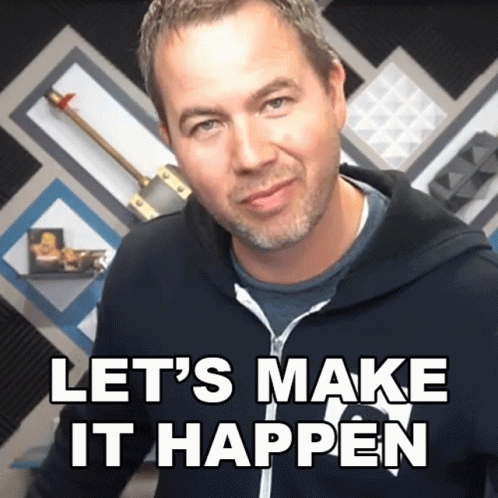

**1. Disease Classification Model**
Model Type: Convolutional Neural Network (CNN)

Objective: The primary goal of this model is to accurately classify leaf images into different disease classes. By doing so, we can identify the specific type of disease affecting the plants.

Description: We will use a CNN architecture for multi-class classification. This model will be trained to distinguish between various disease classes, enabling us to diagnose the type of disease present in a leaf image. Transfer learning using pre-trained models like ResNet or Inception will be considered to leverage their feature extraction capabilities.

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

# Define your dataset paths
train_data_dir = 'path_to_train_data/train'
val_data_dir = 'path_to_train_data/val'
test_data_dir = 'path_to_train_data/test'

# Parameters
batch_size = 32
epochs = 10

# Data Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Rescale pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data Generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),  # Adjust to your desired image size
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(128, 128),  # Adjust to your desired image size
    batch_size=batch_size,
    class_mode='categorical'
)

# Define a simpler CNN model
input_layer = Input(shape=(128, 128, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Evaluate the model on the test dataset
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(128, 128),  # Adjust to your desired image size
    batch_size=batch_size,
    class_mode='categorical'
)

# Make predictions and evaluate
predictions = model.predict(test_generator)
y_pred = [tf.argmax(pred).numpy() for pred in predictions]
y_true = test_generator.classes

print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


Found 18286 images belonging to 19 classes.
Found 3910 images belonging to 19 classes.
Epoch 1/10
572/572 [==============================] - 347s 604ms/step - loss: 1.4736 - accuracy: 0.5226 - val_loss: 0.9198 - val_accuracy: 0.6627
Epoch 2/10
572/572 [==============================] - 336s 586ms/step - loss: 0.8465 - accuracy: 0.6932 - val_loss: 0.9537 - val_accuracy: 0.6821
Epoch 3/10
572/572 [==============================] - 313s 547ms/step - loss: 0.6968 - accuracy: 0.7360 - val_loss: 0.6493 - val_accuracy: 0.7552
Epoch 4/10
572/572 [==============================] - 298s 520ms/step - loss: 0.6250 - accuracy: 0.7627 - val_loss: 1.1278 - val_accuracy: 0.6788
Epoch 5/10
572/572 [==============================] - 308s 538ms/step - loss: 0.5392 - accuracy: 0.7896 - val_loss: 1.0561 - val_accuracy: 0.7107
Epoch 6/10
572/572 [==============================] - 414s 724ms/step - loss: 0.5023 - accuracy: 0.8015 - val_loss: 0.5292 - val_accuracy: 0.7844
Epoch 7/10
572/572 [=================